In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

2025-03-12 09:09:01.086104: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load dataset
df = pd.read_csv('sentiment_dataset_long.csv')

In [3]:

# Load dataset
data = pd.read_csv("sentiment_dataset_long.csv")

# # Tokenize words (simple split by spaces)
# all_words = " ".join(data["text"]).lower().split()

# # Get unique words
# vocab_size = len(set(all_words))
# print("Vocabulary size:", vocab_size)

In [5]:
data

,text,label
0,"Horrible product, do not buy! I have had nothi...",negative
1,"It's okay, not great but not bad either. I don...",neutral
2,"Does what it's supposed to do, I guess. Nothin...",neutral
3,"Does what it's supposed to do, I guess. Nothin...",neutral
4,Exceeded my expectations in every way! The dur...,positive
...,...,...
4995,Fantastic service and top-notch quality! The c...,positive
4996,"It's neither good nor bad, just okay. If you n...",neutral
4997,So happy with my decision to buy this! It’s be...,positive
4998,This has been the worst experience ever. I reg...,negative


In [6]:
df.head()

,text,label
0,"Horrible product, do not buy! I have had nothi...",negative
1,"It's okay, not great but not bad either. I don...",neutral
2,"Does what it's supposed to do, I guess. Nothin...",neutral
3,"Does what it's supposed to do, I guess. Nothin...",neutral
4,Exceeded my expectations in every way! The dur...,positive


In [7]:
# Encode labels
label_map = {"positive": 2, "neutral": 1, "negative": 0}
df["label"] = df["label"].map(label_map)

In [8]:
label_map

{'positive': 2, 'neutral': 1, 'negative': 0}

In [ ]:
# Tokenize text
max_words = 5000  # Vocabulary size
max_len = 100  # Max sequence length
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df["text"])
sequences = tokenizer.texts_to_sequences(df["text"])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding="post")

In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df["label"], test_size=0.2, random_state=42)

In [11]:
X_test.shape

(1000, 100)

In [12]:
# Build Neural Network Model
model = keras.Sequential([
    keras.layers.Embedding(input_dim=max_words, output_dim=16, input_length=max_len),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(3, activation="softmax")
])


In [13]:
# Compile model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           80000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 80,323
Trainable params: 80,323
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=32, verbose=2)

Epoch 1/15
125/125 - 1s - loss: 1.0591 - accuracy: 0.6762 - val_loss: 0.9761 - val_accuracy: 0.6730 - 892ms/epoch - 7ms/step
Epoch 2/15
125/125 - 0s - loss: 0.8041 - accuracy: 0.6880 - val_loss: 0.6125 - val_accuracy: 0.7330 - 227ms/epoch - 2ms/step
Epoch 3/15
125/125 - 0s - loss: 0.4568 - accuracy: 0.9668 - val_loss: 0.3185 - val_accuracy: 1.0000 - 183ms/epoch - 1ms/step
Epoch 4/15
125/125 - 0s - loss: 0.2170 - accuracy: 1.0000 - val_loss: 0.1369 - val_accuracy: 1.0000 - 171ms/epoch - 1ms/step
Epoch 5/15
125/125 - 0s - loss: 0.0912 - accuracy: 1.0000 - val_loss: 0.0596 - val_accuracy: 1.0000 - 168ms/epoch - 1ms/step
Epoch 6/15
125/125 - 0s - loss: 0.0424 - accuracy: 1.0000 - val_loss: 0.0306 - val_accuracy: 1.0000 - 153ms/epoch - 1ms/step
Epoch 7/15
125/125 - 0s - loss: 0.0232 - accuracy: 1.0000 - val_loss: 0.0180 - val_accuracy: 1.0000 - 150ms/epoch - 1ms/step
Epoch 8/15
125/125 - 0s - loss: 0.0143 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 1.0000 - 151ms/epoch - 1ms/step


In [15]:
# Save model and tokenizer
model.save("sentiment_model.h5")
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
    


In [16]:
# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {scores[1] * 100:.2f}%")

Test Accuracy: 100.00%


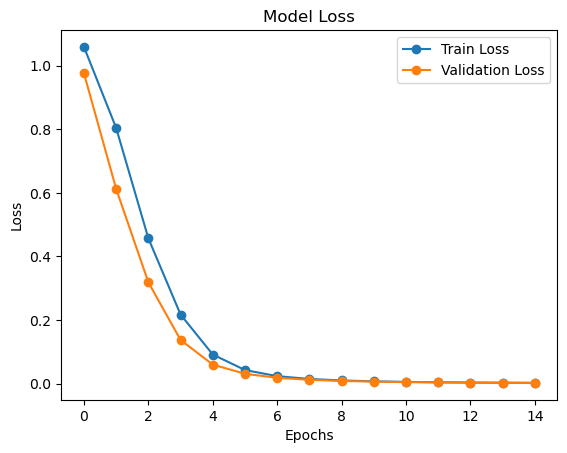

In [17]:
import matplotlib.pyplot as plt
# Plot Training & Validation Accuracy
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
# plt.title('Model Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# Plot Training & Validation Loss
# plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [31]:
# Make predictions line by line for X_test
predicted_sentiments = []
reverse_label_map = {2: "positive", 1: "neutral", 0: "negative"}

for i, sequence in enumerate(X_test[:10]):
    prediction = model.predict(np.array([sequence]))  # Predict for one sample
    predicted_label = np.argmax(prediction, axis=1)[0]  # Get label index
    predicted_sentiments.append(reverse_label_map[predicted_label])
    
    # Print prediction for each text
    print(f"Text: {df['text'].iloc[i]}\nPredicted Sentiment: {predicted_sentiments[-1]}\n")


1/1 [==============================] - 0s 44ms/step
Text: Horrible product, do not buy! I have had nothing but problems, and I am beyond frustrated with this purchase.
Predicted Sentiment: negative

1/1 [==============================] - 0s 28ms/step
Text: It's okay, not great but not bad either. I don't have strong feelings about it, but it does what it's supposed to do.
Predicted Sentiment: negative

1/1 [==============================] - 0s 30ms/step
Text: Does what it's supposed to do, I guess. Nothing more, nothing less. If you need a basic option, this is fine.
Predicted Sentiment: negative

1/1 [==============================] - 0s 22ms/step
Text: Does what it's supposed to do, I guess. Nothing more, nothing less. If you need a basic option, this is fine.
Predicted Sentiment: positive

1/1 [==============================] - 0s 27ms/step
Text: Exceeded my expectations in every way! The durability, performance, and overall value are simply unmatched.
Predicted Sentiment: negative
